In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import corner

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data = np.random.normal(loc=0, scale=1, size=1000)

In [3]:
def normal_sim(a, b):
    return np.random.normal(a, b, 1000)

In [4]:
with pm.Model() as model:
    a = pm.Normal("a", mu=0, sd=5)
    b = pm.HalfNormal("b", sd=1)
#     s = pm.Simulator("s", normal_sim, params=(a, b), sum_stat="mean", epsilon=1, observed=data)
    s = pm.Simulator("s", normal_sim, params=(a, b), sum_stat="sort", epsilon=1, observed=data)

    trace, sim_data = pm.sample_smc(kernel="ABC", parallel=True, save_sim_data=True)
    idata = az.from_pymc3(trace, posterior_predictive=sim_data)

Initializing SMC sampler...
Sampling 6 chains in 6 jobs
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.002
Stage:   2 Beta: 0.008
Stage:   3 Beta: 0.029
Stage:   4 Beta: 0.099
Stage:   5 Beta: 0.320
Stage:   6 Beta: 0.966
Stage:   7 Beta: 1.000


In [5]:
# az.plot_trace(idata, kind="rank_vlines");

In [6]:
az.summary(idata, kind="stats")

,mean,sd,hdi_3%,hdi_97%
a,-0.004,0.045,-0.088,0.08
b,1.000,0.039,0.927,1.07


<AxesSubplot:xlabel='s'>

/home/cosmocicatais/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


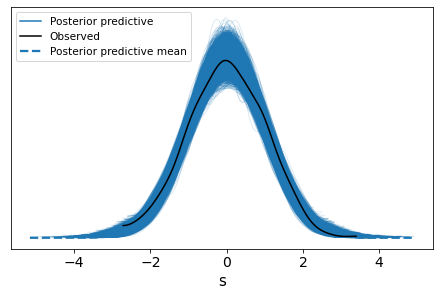

In [7]:
az.plot_ppc(idata,)

array([<AxesSubplot:title={'center':'a'}>,
       <AxesSubplot:title={'center':'b'}>], dtype=object)

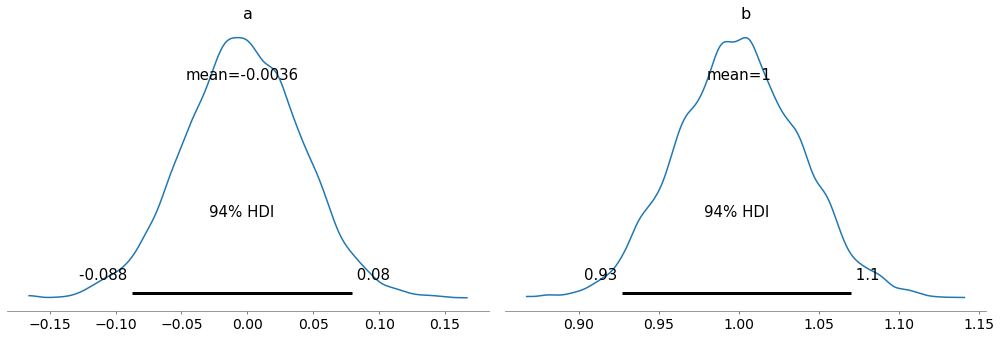

In [8]:
az.plot_posterior(idata)

<AxesSubplot:xlabel='a', ylabel='b'>

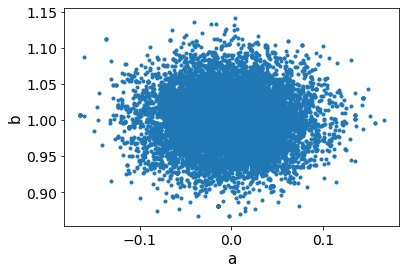

In [9]:
az.plot_pair(idata)

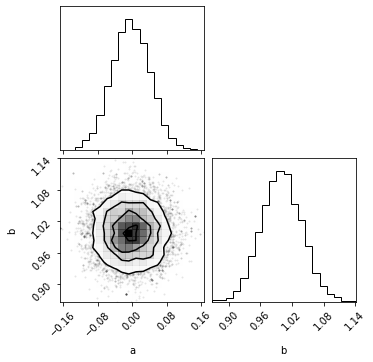

In [10]:
corner.corner(idata)
plt.show()